# NNTI Assignment 8 (Q8.3) **[Parameter Norm Penalties]**

Name 1:  Sayeh Jarollahi<br>
Student id 1: 7073520<br>
Email 1: saja00006@stud.uni-saarland.de<br>

Name 2: Mahsa Amani<br>
Student id 2:  7064006<br>
Email 2:  maam00002@stud.uni-saarland.de<br>

Name 3: <br>
Student id 3:  <br>
Email 3: <br>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective  files for any additional exercises necessary. There is no need to resubmit the data files should they be provided separately. <br>


Upload the zipped folder on CMS. Please follow the naming convention of **Name1_id1_Name2_id2_Name3_id3.zip **. Only one member of the group should make the submisssion.


**NOTE**:
1. Pay close attention to the function doc-strings, they give you clues on what to include in your implementation.

2. Set the `random_seed = 42` for any part of your code that requires randomness.

3. You are free to use the `scikit-learn` library for implementing the regression models.

In this exercise, you will be working on the provided `regularization_dataset.csv` dataset. In this dataset, columns `x0` through `x47` correspond to the input and column `y` corresponds to the output.You will be working with linear regression and using different norm penalties to analyze their regularizing behaviour.

The basic inputs are provided to you. You are free to import additional components, **but add comments to explain why you added them**.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## a. Data setup [0.5 points]
First things first, let's load the dataset. Complete the function `load_data()` to load data from the supplied csv file.



In [3]:
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    """
    Loads a dataset from the specified CSV file, separates the features and target,
    normalizes the features, and splits the data into training and testing sets.

    Parameters:
    - file_path (str): The path to the CSV file containing the dataset.

    Returns:
    - X_train (ndarray): The training set features after normalization.
    - X_test (ndarray): The testing set features after normalization.
    - y_train (ndarray): The training set target values.
    - y_test (ndarray): The testing set target values.
    """
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values  # getting all but last column value 
    y = data.iloc[:, -1].values  # getting last columns value
    scaler = StandardScaler() # 
    X_normalized = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

    

In [4]:
X_train, X_test, y_train, y_test = load_data('regularization_dataset.csv') #Change file path as per requirement

### b. Regression Model setup [0.5 points]

In this part, you will build and evaluate a Linear Regression model trained on the data without any regularization. Complete the function `train_lr()` to train the model, evaluate its performance using Mean Squared Error (MSE), and extract the model's coefficients.

**Tasks to implement**:
- Initialize the Linear Regression model.
- Train the model method on `X_train` and `y_train`.
- Make predictions on the test dataset `X_test`.
- Calculate the Mean Squared Error (MSE) between the predicted and actual values `y_test`.
- Extract the coefficients of the trained model.

In [5]:

from sklearn.linear_model import LinearRegression

def train_lr(X_train, X_test, y_train, y_test):
    """
    This is a wrapper function for training a linear regression model.

    Parameters:
    - X_train: Features for training
    - X_test: Features for testing
    - y_train: Target values for training
    - y_test: Target values for testing

    Returns:
    - model: Trained model
    - mse: the mean-squared error at test time
    - coeffs: List of coefficients from the trained model
    """
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    coeffs = model.coef_.tolist()
    return model, mse, coeffs


## c. Regularized Regression Models [0.5 points]

In this part, you will build and evaluate regularized linear regression models using Ridge, Lasso, and ElasticNet. These models add a penalty term to the loss function to regularize the coefficients, helping to prevent overfitting. You will complete the function `train_lr_reg()` to train models with different regularization types and evaluate their performance

**Tasks to Implement**:

- Based on the reg parameter, initialize the appropriate regression model:
  - Use standard linear regression when `reg` is None.
  - Use ridge when `reg` is `ridge`.
  - Use Lasso when `reg` is `lasso`.
  - Use ElasticNet when `reg` is `elasticnet`.
  - Raise a ValueError for invalid values of `reg`.
- Train the selected model on `X_train` and `y_train`.
- Make predictions on the test dataset `X_test`.
- Calculate the Mean Squared Error (MSE) between the predicted and actual values (`y_test`).
- Extract the coefficients of the trained model.

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
 
def train_lr_reg(X_train, X_test, y_train, y_test, reg=None, alpha=1.0):
    """
    This is a wrapper function for training a linear regression model with optional regularization.

    Parameters:
    - X_train: Features for training
    - X_test: Features for testing
    - y_train: Target values for training
    - y_test: Target values for testing
    - reg: Regularization type ('ridge', 'lasso', 'elasticnet', or None for standard Linear Regression)
    - alpha: Regularization strength (applicable for Ridge, Lasso, and ElasticNet)

    Returns:
    - model: Trained model
    - mse: the mean-squared error at test time
    - coeffs: List of coefficients from the trained model
    """
    if reg is None:
        model = LinearRegression()
    elif reg == 'ridge':
        model = Ridge(alpha=alpha)
    elif reg == 'lasso':
        model = Lasso(alpha=alpha)
    elif reg == 'elasticnet':
        model = ElasticNet(alpha=alpha)
    else:
        raise ValueError("Invalid value for reg. Must be 'ridge', 'lasso', 'elasticnet', or None.")
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    coeffs = model.coef_.tolist()
    return model, mse, coeffs



## d. Hyperparameter Search [0.5 points]

Here, you will perform a grid search over a given range of values for the regularization parameter alpha to find the most optimal value for each type of regularization (Ridge, Lasso, and ElasticNet). The goal is to minimize the Mean Squared Error (MSE) for the model.

For each regularization type (ridge, lasso, and elasticnet), evaluate the model performance over different values of alpha. For each model, you should report:

  - The best value of alpha that minimizes the MSE.
  - The corresponding MSE at the best alpha.

You will then compare the MSE for each regularized model with the MSE obtained from the non-regularized linear regression model (i.e., without any regularization). This will help you assess the impact of regularization on the model performance.

In [9]:
def alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type):
    """
    Evaluates a specified regularization model (Ridge, Lasso, or ElasticNet) over a range of alpha values.
    The function returns the best alpha and MSE for the chosen regularization type.

    Parameters:
    - X_train: Feature matrix for training.
    - X_test: Feature matrix for testing.
    - y_train: Target values for training.
    - y_test: Target values for testing.
    - alphas: List of regularization strengths to evaluate.
    - reg_type: The type of regularization ('ridge', 'lasso', or 'elasticnet').

    Returns:
    - result: A dictionary containing the best alpha and MSE for the selected regularization type.
    """
    best_mse = float('inf')
    best_alpha = 0
    best_model = None
    for alpha in alphas:
        model, mse, coeffs =train_lr_reg(X_train, X_test, y_train, y_test, reg=reg_type, alpha=alpha)
        if mse<best_mse:
            best_model = model
            best_mse = mse
            best_alpha = alpha

    return {
        'Best Alpha': best_alpha, 
        'MSE': best_mse, 
    }

In [10]:
## DONT'T CHANGE THIS CODE BLOCK
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

linear_model, linear_mse, linear_coeffs = train_lr(X_train, X_test, y_train, y_test)
best_ridge = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='ridge')
best_lasso = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='lasso')
best_elasticnet = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='elasticnet')

# Print the results in the desired format
print("Linear Regression (No regularization):")
print(f"  MSE: {linear_mse}\n")

print("Ridge Regression:")
print(f"  Best Alpha: {best_ridge['Best Alpha']}")
print(f"  MSE: {best_ridge['MSE']}\n")

print("Lasso Regression:")
print(f"  Best Alpha: {best_lasso['Best Alpha']}")
print(f"  MSE: {best_lasso['MSE']}\n")

print("ElasticNet Regression:")
print(f"  Best Alpha: {best_elasticnet['Best Alpha']}")
print(f"  MSE: {best_elasticnet['MSE']}\n")

Linear Regression (No regularization):
  MSE: 8.806990226797549

Ridge Regression:
  Best Alpha: 1.0
  MSE: 3.6984012812454607

Lasso Regression:
  Best Alpha: 0.01
  MSE: 3.2780971988989385

ElasticNet Regression:
  Best Alpha: 0.01
  MSE: 3.4199981889276714



/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

## e. Visualize regularization [0.5 points]

Here, you will visualize how the regularization strength parameter $α$ influences both the magnitudes of the model coefficients and the model's mean squared error (MSE). The plot generated should display the following:
- **Coefficient Magnitudes**: The effect of increasing αα on the magnitude of the coefficients for each feature.
- **Mean Squared Error (MSE)**: The impact of different $α$ values on the model's performance, measured by MSE, same as `alpha_search()`.


**Tasks to Implement**:

- Train the specified regularized regression model (Ridge, Lasso, or ElasticNet) using the training data `(X_train, y_train)` for different $\alpha$ values.
- Create a plot with two y-axes:
  - Left y-axis: Display the magnitude of the coefficients for each feature across different values of $\alpha$.
  - Right y-axis: Show the MSE for each value of $\alpha$, indicating how the regularization strength affects model performance.

- For each feature, plot its coefficient magnitude as a function of $\alpha$ (**log scale**) on the left y-axis.

- Plot the MSE for each $\alpha$ on the right y-axis.

In [17]:
def plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='lasso'):
    """
    This function trains a regularized regression model over a range of alpha values,
    then plots the coefficient magnitudes and MSE for each value of alpha on a dual-axis plot.

    Parameters:
    - X_train: Feature matrix for training.
    - X_test: Feature matrix for testing.
    - y_train: Target values for training.
    - y_test: Target values for testing.
    - alphas: List of regularization strengths (alphas) to evaluate.
    - reg_type: Type of regularization ('ridge', 'lasso', or 'elasticnet').

    Returns:
    - None: This function generates and shows a plot.
    """
    mses = []
    coeffs = []
    for alpha in alphas:
        model, mse, coeff = train_lr_reg(X_train, X_test, y_train, y_test, reg=reg_type, alpha=alpha)
        mses.append(mse)
        coeffs.append(coeff)

    coefficients = np.array(coeffs)

    # Create the dual-axis plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot coefficient magnitudes on the left y-axis
    for i in range(coefficients.shape[1]):
        ax1.plot(alphas, np.abs(coefficients[:, i]), label=f'Feature {i+1}')
    ax1.set_xscale('log')
    ax1.set_xlabel('Alpha')
    ax1.set_ylabel('Coefficient Magnitude')
    ax1.set_title(f'Regularization Effect ({reg_type.capitalize()})')
    ax1.grid(True)

    # Plot MSE on the right y-axis
    ax2 = ax1.twinx()
    ax2.plot(alphas, mses, color='black', linestyle='--', label='MSE')
    ax2.set_ylabel('Mean Squared Error')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    # ax1.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()
        

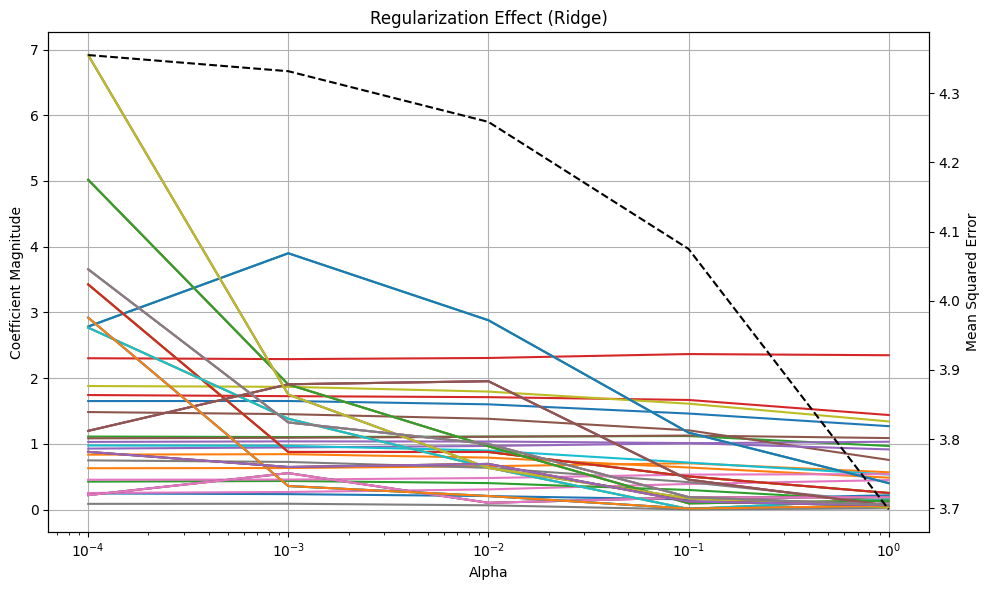

In [18]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='ridge')

/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(


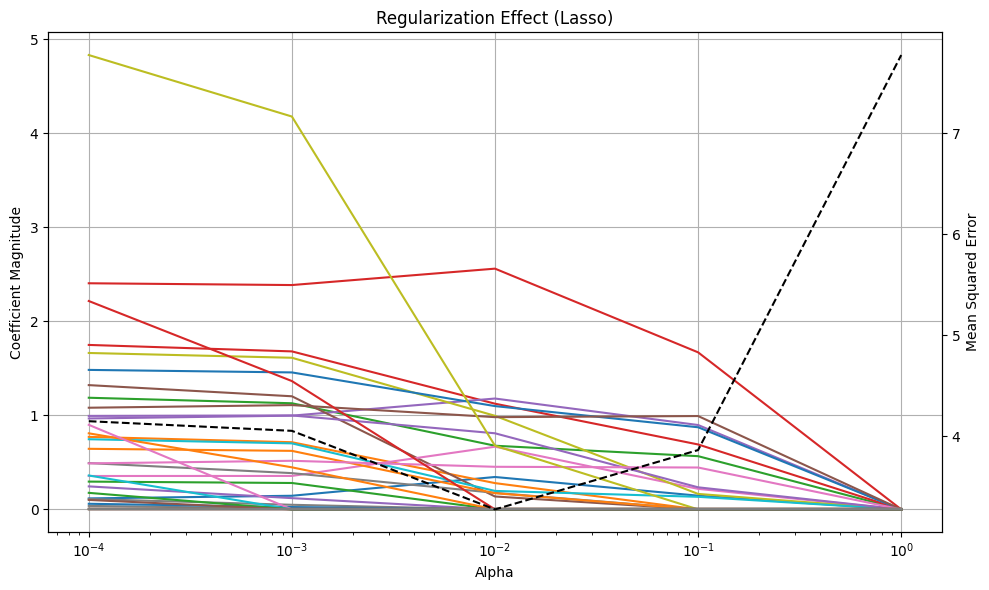

In [19]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='lasso')

/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/Users/sayeh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

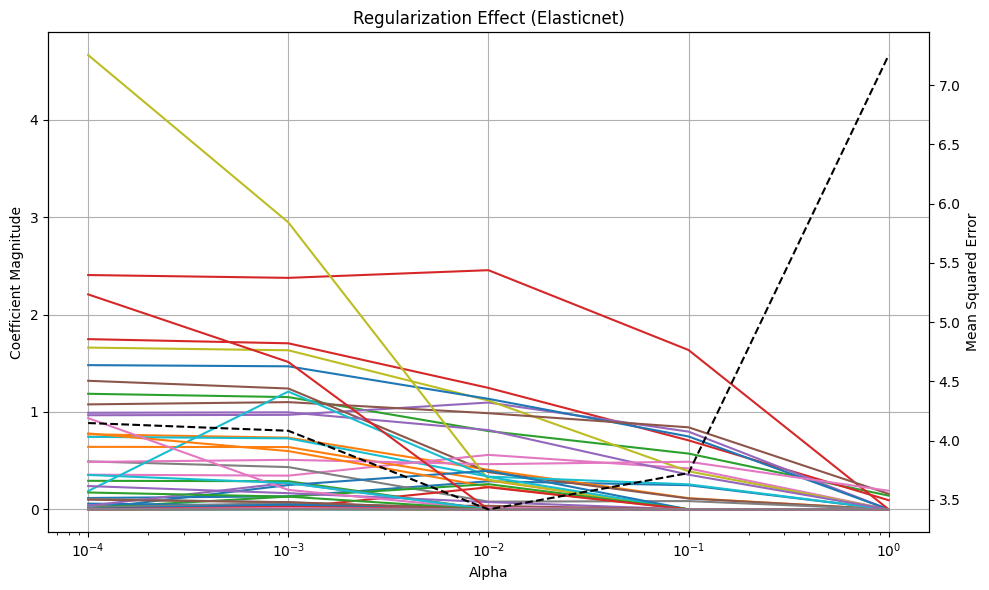

In [20]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='elasticnet')

### Answer the following questions based on your plots: [0.25 + 0.25 points]

Q1: What differences do you observe in the coefficients between lasso ($L_{1}$) and ridge ($L_{2}$) regularization?<br>
Q2: ElasticNet is a combination of both $L_{1}$ and $L_{2}$ regularization, what is its effect on the model coefficients?

A1: As we can see in the plots, in the ridge regression as we increase alpha, the coefficients converge to zero, but they do not exactly get to zero. However in the Lasso Regression, as the alpha increases, some of the coefficients get exactly the value zero. 

A2: ElasticNet inherits both the sparsity of Lasso and the shrinkage effect of Ridge. The L1 penalty tends to drive coefficients toward zero, and when combined with the L2 penalty, it also reduces the overall magnitude of coefficients. As we can see in the plots, the coefficients get smaller values than the Ridge Regression, but not all of them get zero value. 